## INTRODUCING KUTSU 👟:

- As a long time sneakerhead, I've always been interested in the different brands of shoes and their respective styles. I truly believe that a good pair of kicks can make or break an outfit!

- Pairing this interest with my drive to learn more about machine learning, I decided to create a model that can classify images of shoes into their respective brands.

## BRIEF TECHNICAL OVERVIEW 🤓:

- The VGG16 model is a CNN that was trained on the ImageNet dataset. The model is able to classify images into 1000 different classes. I plan on using this model to perform transfer learning on my own training set.

    - As we know, the early layers of a CNN mainly train on features such as colours, edges, borders, meaning that these characteristics are transferable (hence we use transfer learning from the VGG16 model).
    - I want to classify roughly 800+ images of shoes into 3 classes (Nike, Adidas, and Converse).

In [50]:
# importing the required modules:

# regular data manipulation and plotting modules.
import os
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

sys.path.append('../data/train/')
sys.path.append('../data/test/')

# tensorflow and keras modules.
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [51]:
# find the number of classes in the dataset.
def get_all_classes(dataset):
    
    classes = []
    for the_class in sorted(os.listdir(dataset)):
        classes.append(the_class)

    return classes

# retrieve the class names.
classes = get_all_classes('../data/train/')
print(" ")
print('\nThe Classes for our Multiclass-Classification:', classes)

 

The Classes for our Multiclass-Classification: ['adidas', 'converse', 'nike']


## LET'S VISUALIZE THE DATA 📊:

- I've created a function that will take in a directory of images, and all the classes in our training data, and plot each distribution of images per class.
    
    - We can see that the distribution of images per class is exactly balanced, so we don't need to augment our data. This is great news, as it means that we can train our model on the data we have, without having to focus too much on overfitting.
    
        - ``Adidas``: 237 images
        - ``Converse``: 237 images
        - ``Nike``: 237 images


Visualizing the training data:
 
The number of pictures in the class 'adidas' is: 237
The number of pictures in the class 'converse' is: 237
The number of pictures in the class 'nike' is: 237


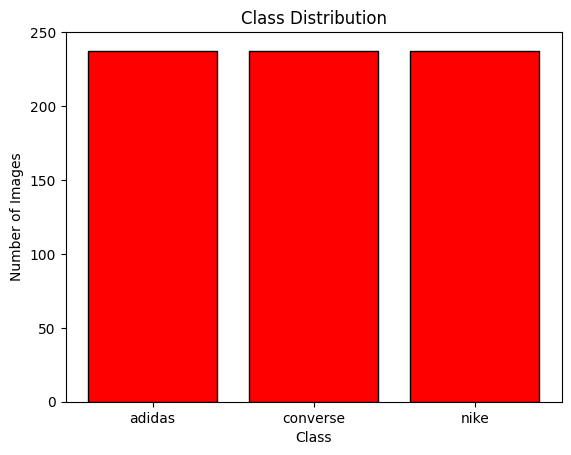

In [52]:
# let's visualize our training data:
def visualize_training_data(directory, classes):

    print('\nVisualizing the training data:')
    print(" ")

    # creating a dictionary to store the number of images per class.
    num_pics_per_class = {}

    for the_class in classes:

        # get the number of images in each class.
        pics_per_class = len(os.listdir(directory + '/' + the_class + '/'))

        # add the number of images to the dictionary.
        print(f"The number of pictures in the class '{the_class}' is: {pics_per_class}")
        num_pics_per_class[the_class] = pics_per_class

    # plot the number of images per class.
    plt.title('Class Distribution')
    plt.ylabel('Number of Images')
    plt.xlabel('Class')
    plt.xticks(range(len(num_pics_per_class)), list(num_pics_per_class.keys()))
    plt.ylim(0, 250)
    plt.bar(range(len(num_pics_per_class)), list(num_pics_per_class.values()), align='center', color='red', edgecolor='black')
    plt.show()

     # for c in classes:
    #     path = os.path.join(directory, c)
    #     for img in os.listdir(path):
    #         img_array = cv2.imread(os.path.join(path,img))
    #         plt.imshow(img_array)
    #         plt.title(c)
    #         plt.show()
    #         break

# call the function to visualize the training data.
visualize_training_data('../data/train/', classes)


## UTILIZING THE VGG16 MODEL 🤖:

- **SUMMARY OF THE ``utilize_vgg16()`` FUNCTION:**
    - **1.** Load the VGG16 model: The VGG16 model is loaded using the ``VGG16()`` function, with the ``input_shape`` argument set to (224, 224, 3) indicating the input image size of 224 x 224 pixels with 3 color channels (RGB). The ``include_top argument`` is set to False to indicate that the last fully connected layer of the VGG16 model should be excluded. The ``weights`` argument is set to 'imagenet' to indicate that the model should be initialized with pre-trained weights on the ImageNet dataset.

    - **2.** Freeze existing layers: The existing layers of the VGG16 model are then frozen using a for loop. This is done so that the existing layers are not modified during the training of the new custom model. Setting the trainable attribute of each layer to False makes sure that their parameters are not updated during backpropagation.

    - **3.** Define the output layer: The output layer is defined using the ``Dense()`` function, with units set to the number of classes in the training data. The number of classes is obtained using the get_all_classes() function. The activation argument is set to ``'softmax'``, which is commonly used for multiclass classification problems. The output layer is connected to the output of the VGG16 model.

    - **4.** Define the model: The final step is to define the model using the Model class from the Keras API. The ``inputs`` argument is set to vgg.input, which are the inputs of the VGG16 model. The ``outputs`` argument is set to the output layer defined in the previous step. The ``name`` argument is set to 'VGG16_Kutsu', which is the name of the custom model. The ``model.summary()`` function is then used to display a summary of the model's architecture.

    - **5.** Return the model: The final line returns the defined model, which can then be used for training, evaluation, and inference.

- Looking for more info on the VGG16 model? Check out this [link](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/)! 📚



In [53]:
# let's work with the VGG16 model.
def utilize_vgg16():

    # load the VGG16 model (we will not include the top layer).
    vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # freeze the layers of the pre-existing VGG16 model, as we will not be training them.
    for layer in vgg.layers:
        layer.trainable = False
    
    # define our own # of neurons in the output layer, with a softmax activation function for multiclass classification.
    output_layer = Dense(units=len(get_all_classes('../data/train/')), activation='softmax')(vgg.output)

    # define the model.
    model = Model(inputs=vgg.input, outputs=output_layer, name='VGG16_Kutsu')
    model.summary()
    
    return model

# call the function to utilize the VGG16 model.
utilize_vgg16()


Model: "VGG16_Kutsu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       